In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import tifffile as tif
import  random

## Import the image data and Traces files for AKT and ERK

In [5]:
## Import path of the data files
#img_path = 'IPQDA_23_ASS_D_DATA\KTR.tif'
Akt_path = 'tracked_AKT_KTR2.csv'
ERK_path = 'tracked_ERK_KTR2.csv'

In [6]:
#image = tif.imread(img_path)
#image.shape
Akt_traces = pd.read_csv(Akt_path,  skiprows=[1,2,3])
ERK_traces = pd.read_csv(ERK_path, skiprows= [1,2,3])

In [61]:
(Akt_traces.TRACK_ID).unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Separate the channels

In [7]:
#Akt_KTR = image[:,0,:,:]
#ERK_KTR = image[:,1,:,:]
#Nuclear_marker = image[:,2,:,:]
#Akt_KTR.shape

## Some Data inspection, also add the total number of unique values

In [8]:
print("Unique rows in TRACK ID column: \nAkt = ", len(Akt_traces.TRACK_ID.unique()), "\nEKT = ",len(ERK_traces.TRACK_ID.unique()))
Akt_unique = len(Akt_traces.TRACK_ID.unique())
ERK_unique = len(ERK_traces.TRACK_ID.unique())
print("Total rows in TRACK ID column: ", "\nAkt",len(Akt_traces.TRACK_ID), "\nEKT", len(ERK_traces.TRACK_ID))

Unique rows in TRACK ID column: 
Akt =  901 
EKT =  932
Total rows in TRACK ID column:  
Akt 22418 
EKT 22483


In [9]:
print(ERK_traces)

         LABEL     ID  TRACK_ID    QUALITY  POSITION_X  POSITION_Y  \
0      ID37571  37571         0  28.649160  253.409379    0.000000   
1      ID26693  26693         0  33.722694  253.409379    0.000000   
2      ID30921  30921         0  25.967352  254.545744    0.000000   
3      ID34251  34251         0  26.240532  254.545744    0.000000   
4      ID31755  31755         0  23.517504  254.545744    0.000000   
...        ...    ...       ...        ...         ...         ...   
22478  ID44219  44219       929  25.488651  570.529403   19.067528   
22479  ID43618  43618       930  12.138129  528.485554  322.413340   
22480  ID44446  44446       930  12.025722  529.019892  322.355325   
22481  ID44742  44742       931   1.515579  641.418158  721.369330   
22482  ID43912  43912       931   1.483028  640.923377  722.601040   

       POSITION_Z   POSITION_T  FRAME  RADIUS  VISIBILITY  MANUAL_SPOT_COLOR  \
0             0.0  4320.258789     16    12.5           1                NaN   

# A function to perform all the calculations of intensities of the traces per time frame by extracting X and Y from the TrackMate exported csv, but WE DONT NEED THEM SO THIS IS COMMENTED**

In [10]:
"""# calculate the pixel size to transform the X,Y positions from microns to pixels (validated from Metadata= 0.88)
# pixels/ microns
pixel_size = 1024 / 1163.6377
n = 50

def bootstrap_intensity(channel, traces):
    # bootstraping sampling times
    n_bootstrap = n
    # that list contains the median value of each time frame
    median_intensity_timeframes = []
    ID_list = traces["TRACK_ID"][3:].tolist()
    # Number of timeframes
    n_timepoints = len(channel)
    # Loop over all the traces per timeframe and calculate the median
    for f in range (n_timepoints):
        intensity_list= []
        for s in range (n_bootstrap):
            id_number = random.choice(ID_list) # pick a random trace sample
            row_index = traces.loc[traces["TRACK_ID"]== id_number] # get the row index

            # Get the X, Y positions
            X = row_index.iloc[0]["TRACK_X_LOCATION"]
            Y = row_index.iloc[0]["TRACK_Y_LOCATION"]

            # Tranform X, Y because they are string and lso in microns
            X_trans = round(float(X) * pixel_size)
            Y_trans = round(float(Y) * pixel_size)
            # Get the intensities from the specific X, Y positions for the specific time-Frame
            intensity = channel[f, X_trans, Y_trans]
            intensity_list.append(intensity)

        median_int = np.median(intensity_list)
        median_intensity_timeframes.append(median_int)
    # Normalised intensities
    normalised_int = median_intensity_timeframes/(np.median(median_intensity_timeframes[0:6]))
    # global median int of the normalised intensities
    global_int = np.median(normalised_int)

    return median_intensity_timeframes , normalised_int, global_int"""

'# calculate the pixel size to transform the X,Y positions from microns to pixels (validated from Metadata= 0.88)\n# pixels/ microns\npixel_size = 1024 / 1163.6377\nn = 50\n\ndef bootstrap_intensity(channel, traces):\n    # bootstraping sampling times\n    n_bootstrap = n\n    # that list contains the median value of each time frame\n    median_intensity_timeframes = []\n    ID_list = traces["TRACK_ID"][3:].tolist()\n    # Number of timeframes\n    n_timepoints = len(channel)\n    # Loop over all the traces per timeframe and calculate the median\n    for f in range (n_timepoints):\n        intensity_list= []\n        for s in range (n_bootstrap):\n            id_number = random.choice(ID_list) # pick a random trace sample\n            row_index = traces.loc[traces["TRACK_ID"]== id_number] # get the row index\n\n            # Get the X, Y positions\n            X = row_index.iloc[0]["TRACK_X_LOCATION"]\n            Y = row_index.iloc[0]["TRACK_Y_LOCATION"]\n\n            # Tranform X, Y

## Function based on the Workflow to extract normalised

In [11]:
n = 894
b = 20
def bootstrap_intensity(traces):
    # bootstraping sampling times
    n_Samples = n
    n_bootstraps = b
    # Number of timeframes
    n_timepoints = 26

    # that list contains the median value of each time frame
    ID_list = traces["TRACK_ID"]
    # dataframe to save timepoint median values for each bootstrap
    bootstrap_df = pd.DataFrame(index=range(n_timepoints))

    # Loop over all the traces per timeframe and calculate the median
    for boots in range (n_bootstraps):
        normalised_int = []
        # List to store 27 timepoint median values
        median_int_frame =  []
        for t in range (n_timepoints):
            intensity_list = []
            for s in range (n_Samples):
                id_number = random.choice(ID_list) # pick a random trace sample
                row_index = traces.loc[traces["TRACK_ID"]== id_number] # get the row index
                intensity = row_index.loc[row_index["FRAME"] == t, "MEDIAN_INTENSITY_CH1"].values
                intensity_list.extend(intensity)


            intensity_array = np.array(intensity_list)
            median_int = np.median(intensity_array, axis=0)
            median_int_frame.append(median_int)

        # Normalised intensities from 1st to

        normalised_int = median_int_frame/(np.median(median_int_frame[0:6]))
        bootstrap_df[f"Bootstrap_{boots}"] = normalised_int

    global_median = bootstrap_df.median(axis=1).tolist()
    return bootstrap_df, global_median

In [12]:
# Get all the intensity values we need
Bootstrap_Akt_df, global_Akt = bootstrap_intensity(Akt_traces)
Bootstrap_ERK_df, global_ERK = bootstrap_intensity(ERK_traces)

In [13]:
#Bootstrap_ERK_df.head(26)
print(global_Akt)

[1.0, 0.8571428571428571, 1.0, 1.0, 1.0, 1.0, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.42857142857142855, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


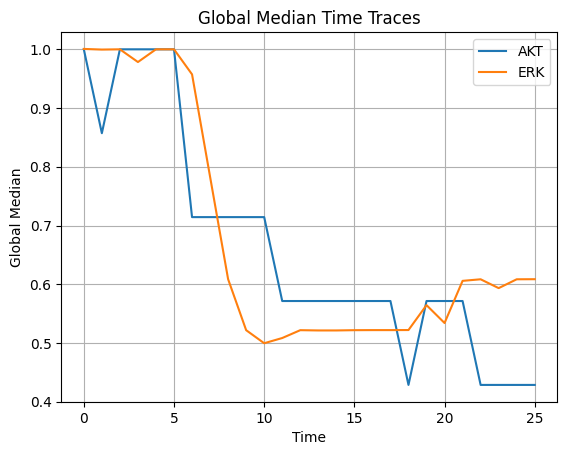

In [14]:
# Plotting of the global median for Atk and ERK
time_points = range(len(global_Akt))

#plt.figure(figsize=(10, 6))
plt.plot(time_points, global_Akt, label='Atk')
plt.plot(time_points, global_ERK, label='ERK')

plt.xlabel('Time')
plt.ylabel('Global Median')
plt.title('Global Median Bootstrapped Time Traces')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
 # get the minimum intensity from 7 and after
min_intensity_ERK = np.min(global_ERK[7:])
min_intensity_Akt = np.min(global_Akt[7:])
# get the frames that this minimum exist, if more than one exist i will choose the 1st occurrence
min_timeFrame_ERK = np.where(global_ERK == min_intensity_ERK)
min_timeFrame_Akt = np.where(global_Akt == min_intensity_Akt)

print(f"minimal_intensity ERK : {min_intensity_ERK}, minimal_intensity AKT :{min_intensity_Akt}")

minimal_intensity ERK : 0.49955317247542447, minimal_intensity AKT :0.42857142857142855


In [64]:
global_SteadyState_ERK = np.median(global_ERK[:6])
global_SteadyState_Akt = np.median(global_Akt[:6])
print(f"Global Steady State ERK : {global_SteadyState_ERK}, Global Steady State AKT :{global_SteadyState_Akt}")

Global Steady State ERK : 1.0, Global Steady State AKT :1.0


# Max change for the kinases by subtracting the min intensity from the global steady state and divide by that

In [65]:
max_change_ERK = (global_SteadyState_ERK - min_intensity_ERK)/global_SteadyState_ERK
max_change_Atk = (global_SteadyState_Akt - min_intensity_Akt)/global_SteadyState_Akt
print(f"Max change ERK = {max_change_ERK}\nMax change Atk = {max_change_Atk}")

Max change ERK = 0.5004468275245755
Max change Atk = 0.5714285714285714


In [66]:
print(min_timeFrame_ERK)
print(min_timeFrame_Akt)
type(min_intensity_ERK)

(array([10], dtype=int64),)
(array([18, 22, 23, 24, 25], dtype=int64),)


numpy.float64

In [68]:
# Drop anything before 7th frame
#filtered_min_Akt = [frames for frames in min_timeFrame_Akt if frames >= 7 ]
#filtered_min_ERK = [frames for frames in min_timeFrame_ERK if frames >= 7 ]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [70]:
#Rate of change
Frame_intrvl = 270.01617
# devide spoted min intensity with 60 ( minutes) multiplied by the frame interval, also pick only the 1st min spotted
Duration_AKT = (min_timeFrame_Akt[0][0] ) * Frame_intrvl /60
Duration_ERK = (min_timeFrame_ERK[0][0]) * Frame_intrvl /60

RateOfChange_Akt = max_change_Atk / Duration_AKT
RateOfChange_ERK = max_change_ERK / Duration_ERK


print(f"Rate Of Change: \nERK = {RateOfChange_ERK}\nAtk = {RateOfChange_Akt}")

Rate Of Change: 
ERK = 0.011120374624776927
Atk = 0.0070542512500710785


# Calculate the rates